In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [32]:
S= "DAI.DE"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("..//model_data//"+S+".csv")

In [33]:
df= pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-02,29.342800,30.088438,29.222137,29.955399,3413831
2010-11-03,30.011090,30.413302,29.766670,29.912085,3589046
2010-11-04,30.382358,31.025896,30.196723,30.939266,4438329
2010-11-05,30.988771,31.217721,30.230758,30.283354,5409517
2010-11-08,30.369984,30.379266,30.023464,30.280260,2655968


In [34]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2534 entries, 2010-11-02 to 2020-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2534 non-null   float64
 1   High    2534 non-null   float64
 2   Low     2534 non-null   float64
 3   Close   2534 non-null   float64
 4   Volume  2534 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8 KB


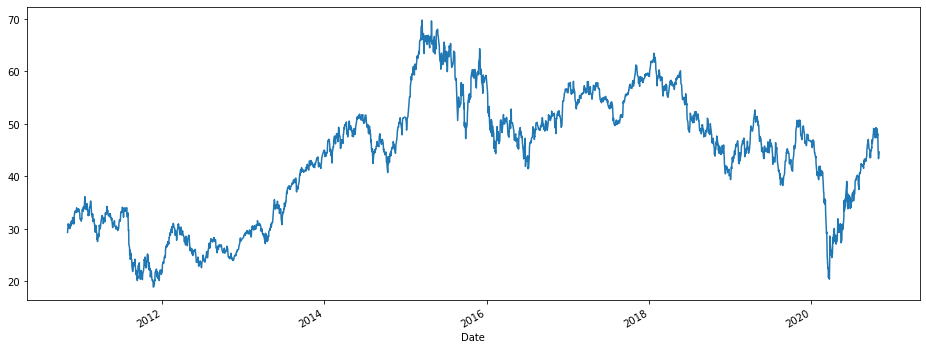

In [36]:
df['Open'].plot(figsize=(16,6))

In [37]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [39]:
X_train = []
y_train = []
for i in range(60, len(training_df)-4):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i+4, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train.shape

(1963, 60, 1)

In [41]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
# Initialising the RNN
regressor = Sequential()

In [44]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [45]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1963/1963 [==============================] - 19s 10ms/step - loss: 0.0287
Epoch 2/100
1963/1963 [==============================] - 10s 5ms/step - loss: 0.0072
Epoch 3/100
1963/1963 [==============================] - 11s 6ms/step - loss: 0.0065: 1s - loss
Epoch 4/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0059
Epoch 5/100
1963/1963 [==============================] - 13s 7ms/step - loss: 0.0060
Epoch 6/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0057
Epoch 7/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0054
Epoch 8/100
1963/1963 [==============================] - 13s 7ms/step - loss: 0.0047
Epoch 9/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0047
Epoch 10/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0050
Epoch 11/100
1963/1963 [==============================] - 14s 7ms/step - loss: 0.0046
Epoch 12/100
1963/1963 [===========================

# Testing

In [46]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicted_stock_price = regressor.predict(X_test)

In [49]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(443, 1)

In [50]:
y_test

array([[0.52844122],
       [0.53034669],
       [0.53675581],
       [0.54749546],
       [0.53866125],
       [0.5300001 ],
       [0.51787469],
       [0.47127835],
       [0.46166454],
       [0.47344364],
       [0.4900728 ],
       [0.50332411],
       [0.47249085],
       [0.49379702],
       [0.49397017],
       [0.50332416],
       [0.52844117],
       [0.52844115],
       [0.53900764],
       [0.54749542],
       [0.54818836],
       [0.53675584],
       [0.54784189],
       [0.55788869],
       [0.55199926],
       [0.53710219],
       [0.52480352],
       [0.48773435],
       [0.50211166],
       [0.51544967],
       [0.50072589],
       [0.51129228],
       [0.51735508],
       [0.52220524],
       [0.51562285],
       [0.54628293],
       [0.51978008],
       [0.52445711],
       [0.50107231],
       [0.50592252],
       [0.50609574],
       [0.51389062],
       [0.51354416],
       [0.54229893],
       [0.57001423],
       [0.58733629],
       [0.58906845],
       [0.603

In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [52]:
predicted_stock_price

array([[45.057858],
       [45.107986],
       [45.319317],
       [45.780487],
       [46.129837],
       [46.307533],
       [46.36055 ],
       [46.411   ],
       [46.589417],
       [46.684345],
       [46.582478],
       [46.2554  ],
       [45.34092 ],
       [44.216278],
       [43.470955],
       [43.41076 ],
       [43.945194],
       [44.2684  ],
       [44.557686],
       [44.78155 ],
       [45.00311 ],
       [45.46551 ],
       [45.9427  ],
       [46.395523],
       [46.819458],
       [47.128468],
       [47.15203 ],
       [47.164677],
       [47.34473 ],
       [47.522095],
       [47.461018],
       [47.13723 ],
       [46.323055],
       [45.627323],
       [45.418003],
       [45.37723 ],
       [45.519478],
       [45.793617],
       [46.099823],
       [46.224102],
       [46.556503],
       [46.59133 ],
       [46.445454],
       [45.96378 ],
       [45.478115],
       [45.169888],
       [45.168663],
       [45.357994],
       [45.95773 ],
       [46.9991  ],


In [53]:
actual_stock_price.shape

(443, 1)

In [54]:
predicted_stock_price.shape

(443, 1)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

2.6540884902104533

In [56]:
df = pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df= df[['Open']]
df= df[int(len(df)*(4/5))+64:]
pred_df=pd.DataFrame(predicted_stock_price)
df['Open2']= predicted_stock_price

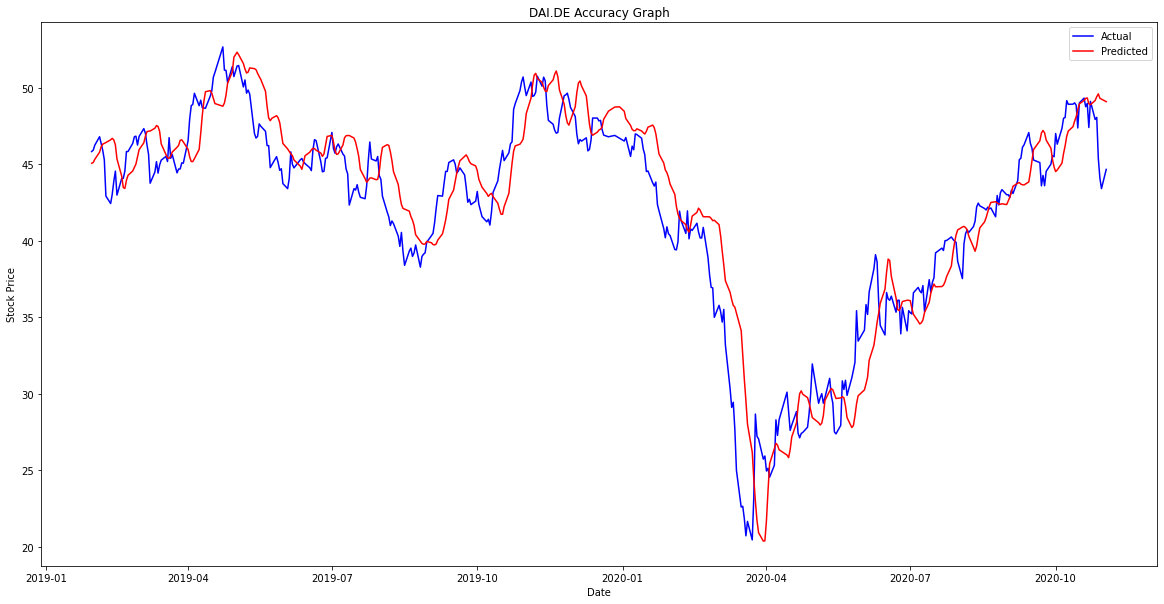

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Actual','Predicted'])
plt.savefig("..//model_data//"+S+'_accuracy_graph.png')

In [58]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

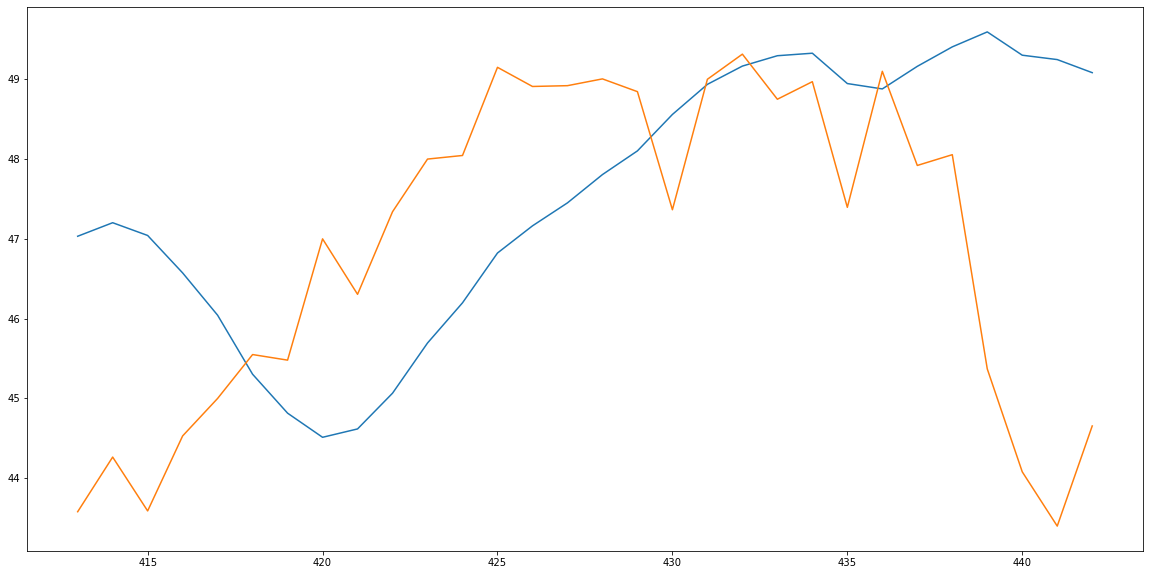

In [59]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [60]:
import pickle
Pkl_Filename = "..//model_data//"+S+"_Model.pkl"  
sc_file= "..//model_data//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)